In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# Question 1
## The Game of Frogger

#### The game of Frogger is a simple game where a frog starts at one side of a stream and tries to get to the other side of the stream. The stream has within it N lily pads. The frog starts, effectively, on pad 0 and can jump to pad 1, 2, 3, ..., N+1. The frog is equally likely to jump to any of the pads 1, 2, 3, ..., N+1.  The frog gets to the other side when she reaches pad N+1.

a)	Consider the case where the frog can jump both forwards and backwards.  That is, at any moment, the frog can jump to any other lily pad, or all the way across the stream, or all the way back to the starting point (with equal probability of jumping to any new position.  Calculate the average number of jumps taken as a function of the number of lily pads.  Explain the result that you see, either through comparison with the forward-jump-only rule result, or with a theoretical prediction for this new rule set, or both.

Set the number of lilypads

In [43]:
n = 100

In [44]:
random.seed(1)

In [45]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
eval_harmonic = [] # array for the analytic solution
x_harmonic = [] # array for the harmonic mean
sigma = [] # array for the error on the expectation value

In [46]:
#
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0,n+1): 

    if (npad == 0):
        eval.append(1)
    else:
        sum1 = 1.0
        for i in range(0,npad):
            #print(i,npad,npad-i)
            #print(eval[npad-i-1])
            sum1 = sum1 + 1.0/(npad+1)*(eval[npad-i-1])
        eval.append(sum1)
    #print("Theory: ",npad,eval[npad])
  

In [47]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between 1 and the number of lilypads left to jump
            # jump = int(random.uniform(1,(end-current_paddle+1)))
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle =int(random.uniform(0,end+1))
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))
  

Expectation value for n = 0 is 1.948000
Expectation value for n = 1 is 2.977000
Expectation value for n = 2 is 4.067000
Expectation value for n = 3 is 4.990000
Expectation value for n = 4 is 6.066000
Expectation value for n = 5 is 6.901000
Expectation value for n = 6 is 7.629000
Expectation value for n = 7 is 8.835000
Expectation value for n = 8 is 9.559000
Expectation value for n = 9 is 10.563000
Expectation value for n = 10 is 11.994000
Expectation value for n = 11 is 13.377000
Expectation value for n = 12 is 13.356000
Expectation value for n = 13 is 15.437000
Expectation value for n = 14 is 16.247000
Expectation value for n = 15 is 16.538000
Expectation value for n = 16 is 18.254000
Expectation value for n = 17 is 18.984000
Expectation value for n = 18 is 21.057000
Expectation value for n = 19 is 20.879000
Expectation value for n = 20 is 22.252000
Expectation value for n = 21 is 23.743000
Expectation value for n = 22 is 23.899000
Expectation value for n = 23 is 24.505000
Expectation

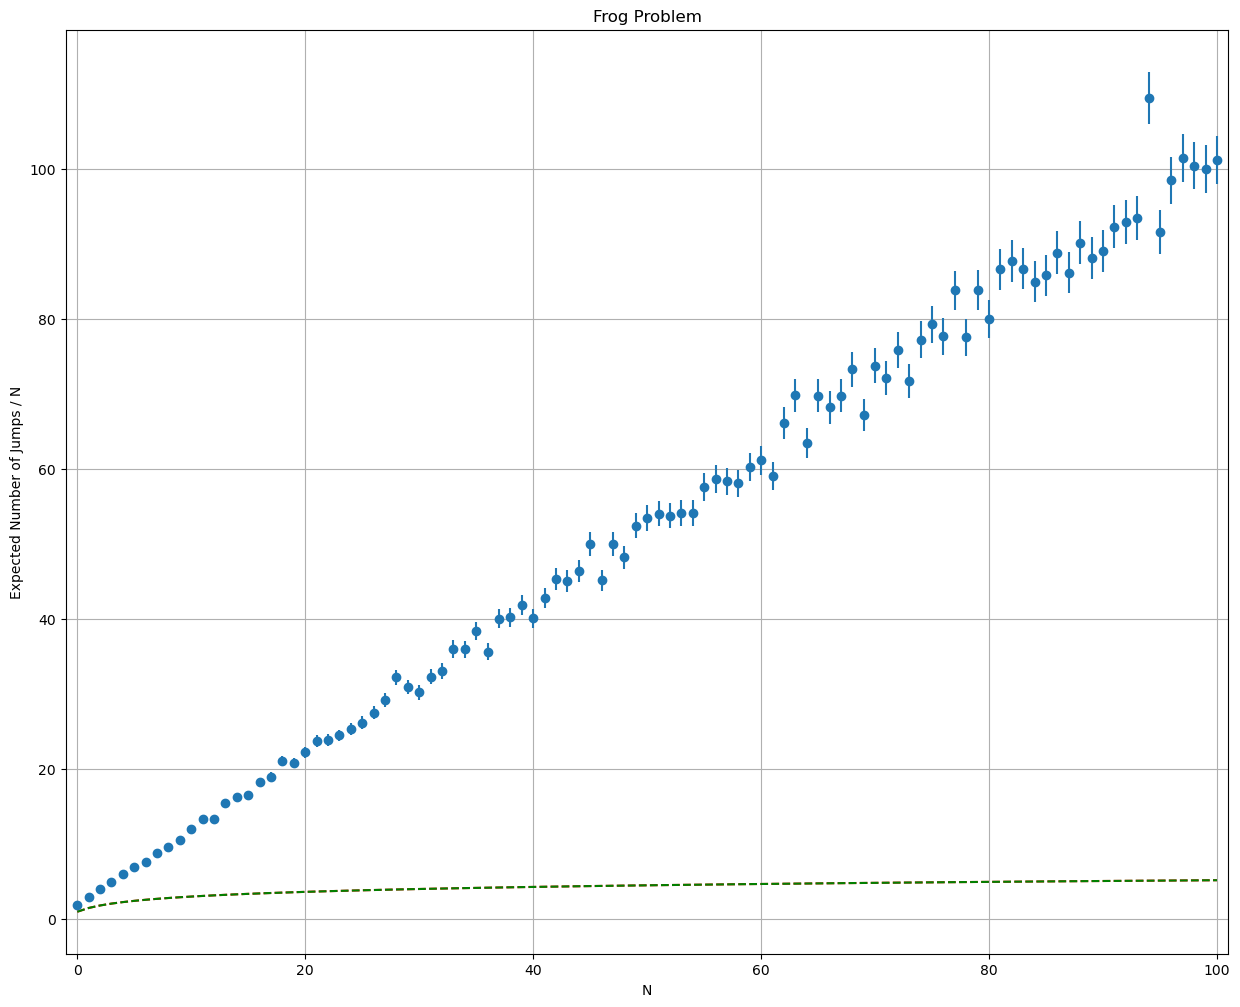

In [48]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,eval,'r--')
ax1.plot(x,eval_harmonic,'g--')


b)	Consider the case where the frog can only jump forward, but now the probability of jumping to some lily pad (or all the way across the stream) is inversely proportional to the length of the jump.

You will need to calculate a discrete probability distribution for each jump that is properly normalized.  For example, if there are ten lily pads, and the frog is on lily pad six, then she has five possible jump locations: lily pads 7, 8, 9, 10, and across the stream (11)).  You will need to calculate a discrete probability distribution for these five possible jump locations where the probabilities are inversely proportional to the jump distance AND is properly normalized.

Compare the results of the plot of expected number of jumps as a function of the number of lily pads to the original case studied in class, and comment on the results.  Do you expect to see a larger number of jumps, on average, or a smaller number of jumps, on average, compared to the original version studied in class.

Bonus:  You will win my eternal admiration if you can come up with a “theory” that describes this new distribution!  Hint:  think about how, in the original example, we found a way to calculate the theory prediction recursively.


In [49]:
dist = [1/p for p in range(1, 10)]
dist1 = np.array(dist)/sum(dist)
print(dist)
print(sum(dist))
print(dist1)

[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111]
2.8289682539682537
[0.35348576 0.17674288 0.11782859 0.08837144 0.07069715 0.05891429
 0.05049797 0.04418572 0.0392762 ]


In [53]:
for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            
            dist = [1/p for p in range(1, end-current_paddle+1)]
            dist = np.array(dist)/sum(dist) 
            
            # choose a random jump size between 1 and the number of lilypads left to jump
            jump = int(random.uniform(1,(end-current_paddle+1), ))
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))

[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111]
2.8289682539682537
[0.35348576 0.17674288 0.11782859 0.08837144 0.07069715 0.05891429
 0.05049797 0.04418572 0.0392762 ]


Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.660000
Expectation value for n = 2 is 2.219000
Expectation value for n = 3 is 2.590000
Expectation value for n = 4 is 2.936000
Expectation value for n = 5 is 3.309000
Expectation value for n = 6 is 3.567000
Expectation value for n = 7 is 3.758000
Expectation value for n = 8 is 4.106000
Expectation value for n = 9 is 4.262000
Expectation value for n = 10 is 4.514000
Expectation value for n = 11 is 4.670000
Expectation value for n = 12 is 4.931000
Expectation value for n = 13 is 5.056000
Expectation value for n = 14 is 5.297000
Expectation value for n = 15 is 5.339000
Expectation value for n = 16 is 5.572000
Expectation value for n = 17 is 5.725000
Expectation value for n = 18 is 5.817000
Expectation value for n = 19 is 6.083000
Expectation value for n = 20 is 6.008000
Expectation value for n = 21 is 6.195000
Expectation value for n = 22 is 6.181000
Expectation value for n = 23 is 6.463000
Expectation value for n = 

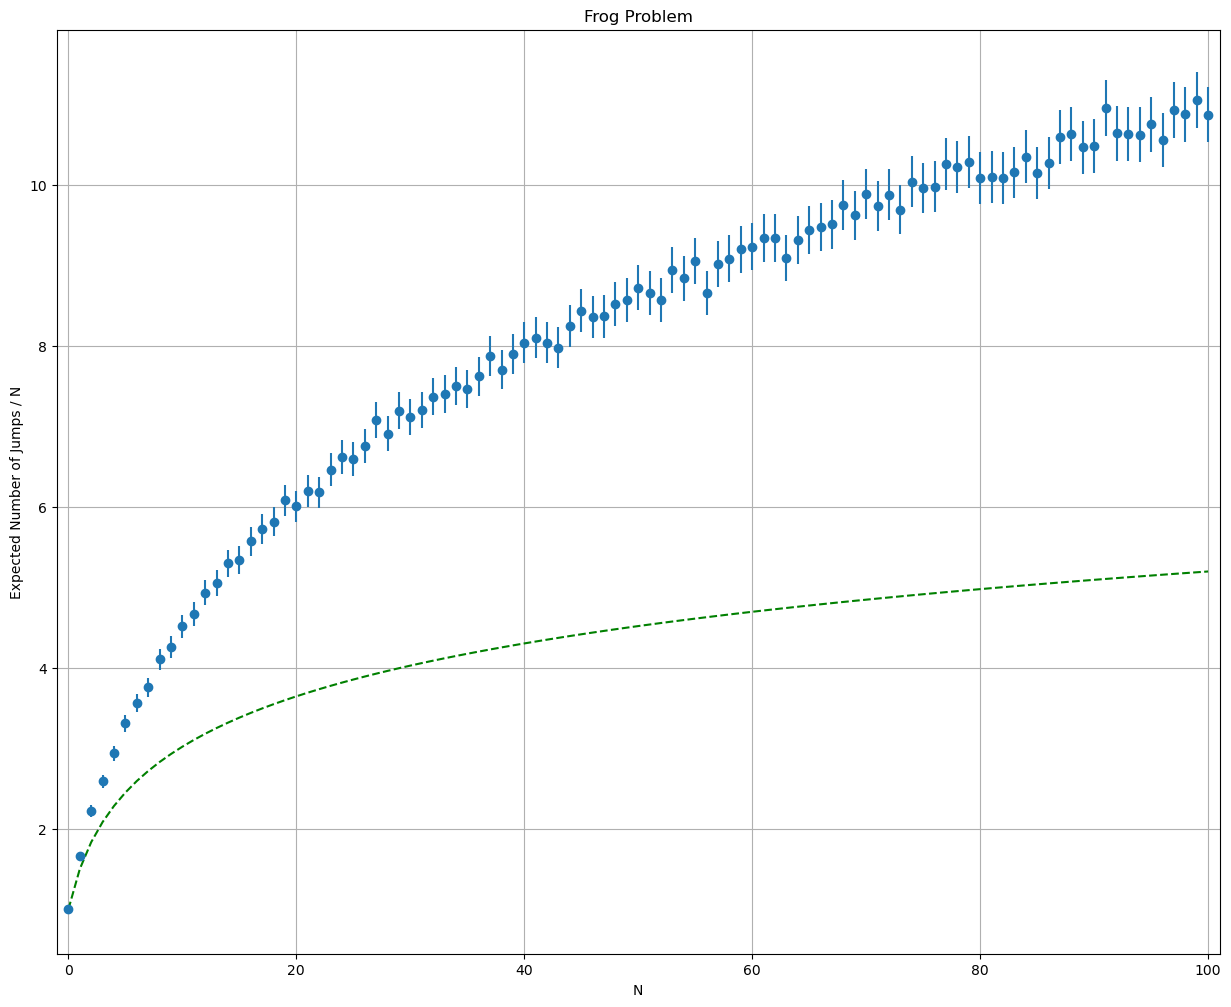

In [55]:
# plot the results

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,eval,'r--')
ax1.plot(x,eval_harmonic,'g--')